
Insurance Claim Fraud Detection

Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables

1.	months_as_customer: Number of months of patronage

2.	age: the length of time a customer has lived or a thing has existed

3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer

4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance

5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.	policy_csl: is basically Combined Single Limit

7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss


8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies


10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis
of their reproductive functions

12.	insured_education_level: This refers to the Level of education of the customer

13.	insured_occupation: This refers Occupation of the customer

14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership

16.	capital-gains: This refers to profit accrued due to insurance premium

17.	capital-loss: This refers to the losses incurred due to insurance claims

18.	incident_date: This refers to the date which claims where made by customers

19.	incident_type: This refers to the type of claim/vehicle damage made by customer

20.	collision_type: This refers to the area of damage on the vehicle

21.	incident_severity: This refers to the extent/level of damage

22.	authorities_contacted: This refers to the government agencies that were contacted after damage

23.	incident_state: This refers to the state at which the accident happened

24.	incident_city: This refers to the city at which the accident happened

25.	1ncident_location: This refers to the location at which the accident happened

26.	incident_hour_of_the_day: The period of the day which accident took place

27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident

28.	property_damage: This refers to whether property was damaged or not

29.	bodily_injuries: This refers to injuries sustained

30.	witnesses: This refers to the number of witnesses involved

31.	police_report_available: This refers to whether the report on damage was documented or not

32.	total_claim_amount: This refers to the financial implications involved in claims

33.	injury_claim: This refers to physical injuries sustained

34.	property_claim: This refers to property damages during incident

35.	vehicle_claim: This refers to property damages during incident

36.	auto_make: This refers to the make of the vehicle

37.	auto_model: This refers to the model of the vehicle

38.	auto_year: This refers to the year which the vehicle was manufactured

39.	_c39:

40.	fraud_reported



Dataset Link-  

•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv




In [1]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


# Importing dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


We observe that in this data set numerical as well as categorical data is present

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Exploratory data analysis

In [4]:
#checking the null value of  column of dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We observe that there is  missing value in _c39 feature 

In [5]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 1000


<Axes: >

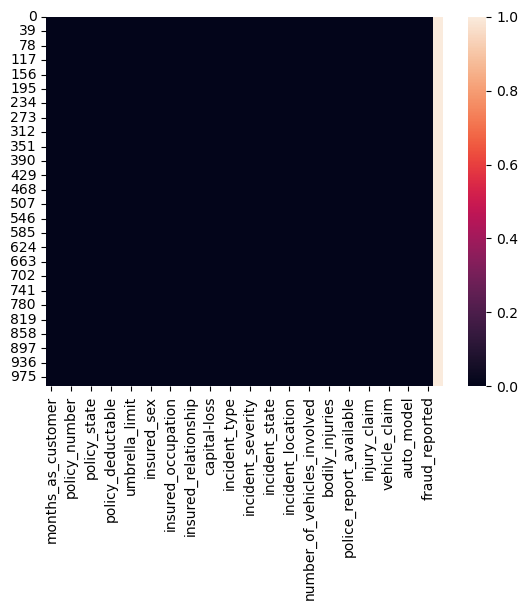

In [6]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that there is  null value present in _c39 column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

we observe that there is  null value in one feature

In [8]:
#checking the shape of dataset
df.shape

(1000, 40)

we observe that there is 1000 row and 40 column are present

In [9]:
#checking the column of dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [10]:
# to convert index from row to column
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [11]:
#checking the types of column of dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

we observe that there is three datatype are present int,float and object

In [12]:
#checking the unique values of column of dataset
df.nunique().to_frame("No. of unique values")

,No. of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


We observe that our target fraud_reported have two unique value 

In [13]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [14]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

We observe that fraud_reported yes 247 and not reported to 753 customer

In [15]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', '_c39']


There are 19 Numerical column are present and 21Categorical columns also present

# Description of data set

In [16]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


This gives the all statical information of the numerical columns.There is no negative or 
invalid value is present hence we can say that it is perfect

we can obserbe these points:
    
1.The counts of all columns are not  same it means there is  missing value in many column

2.The mean value is more than median(50%) in approx all features it means there is right hand skewness

3.There is major difference beteen 75% and max in all features it means the outliers are present in these columns

4.In this discription min,std and 25% ditail also found

# Encoding columns value

In [17]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[categorical_col] = df[categorical_col].apply(lambda col: le.fit_transform(col))

In [18]:

#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: []


Numerical columns: ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', '_c39']


we observe that all columns are converted in numerical columns

# Cleaning of dataset

In [19]:
df.drop(['_c39'], axis=1, inplace=True)

In [20]:
#checking the null value of  column of dataset
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [21]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

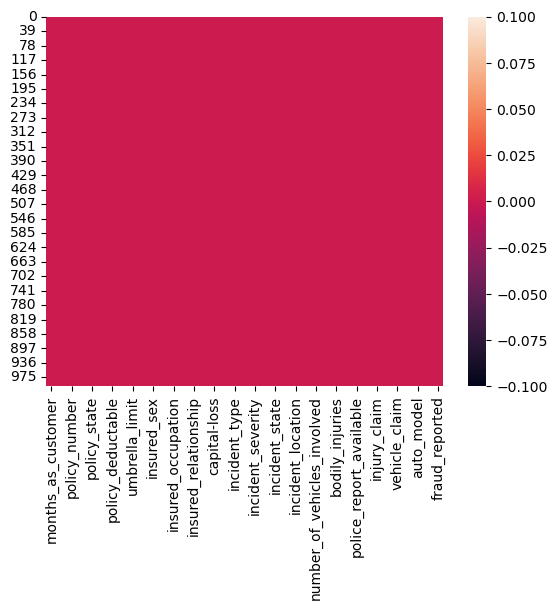

In [22]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that all nan or missing values drop out and there is no missing value present

# Data visualization

0    753
1    247
Name: fraud_reported, dtype: int64


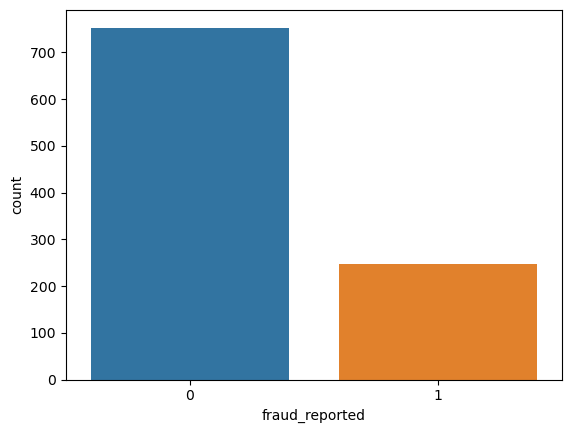

In [23]:
#visualizing the no of Loan_Status
ax=sns.countplot(x='fraud_reported',data=df)
print(df['fraud_reported'].value_counts())

We observe that 753 customer are not fraud reported and 257 are reported froud

[Text(0.5, 1.0, 'policy_annual_premium effect on fraud_reported')]

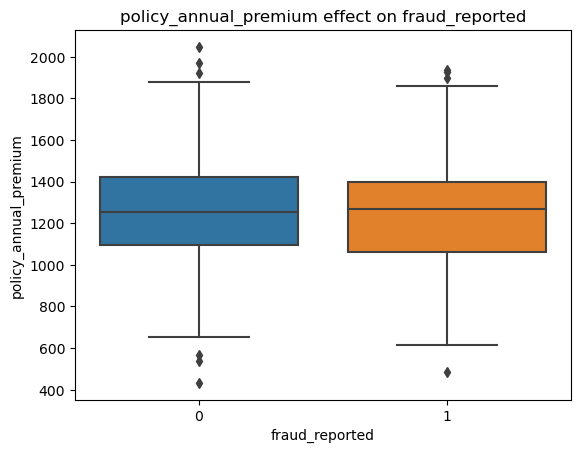

In [24]:
bp = sns.boxplot(x='fraud_reported',y='policy_annual_premium', data=df)
bp.set(title="policy_annual_premium effect on fraud_reported")

we observe that if policy annual premium is high froud report rate for yes is low 

[Text(0.5, 1.0, 'total_claim_amount effect on fraud_reported')]

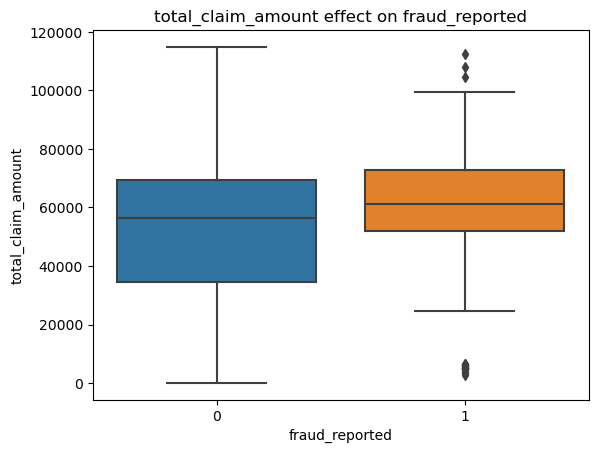

In [25]:
bp = sns.boxplot(x='fraud_reported',y='total_claim_amount', data=df)
bp.set(title="total_claim_amount effect on fraud_reported")

we observe that total_claim_amount is low froud reported no

[Text(0.5, 1.0, 'property_damage effect on fraud_reported')]

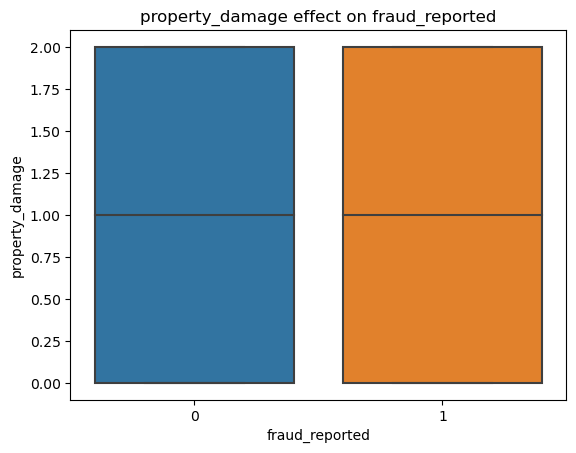

In [26]:
bp = sns.boxplot(x='fraud_reported',y='property_damage', data=df)
bp.set(title="property_damage effect on fraud_reported")

we observe that effect of property_damage not seen 

[Text(0.5, 1.0, 'insured_occupation effect on fraud_reported')]

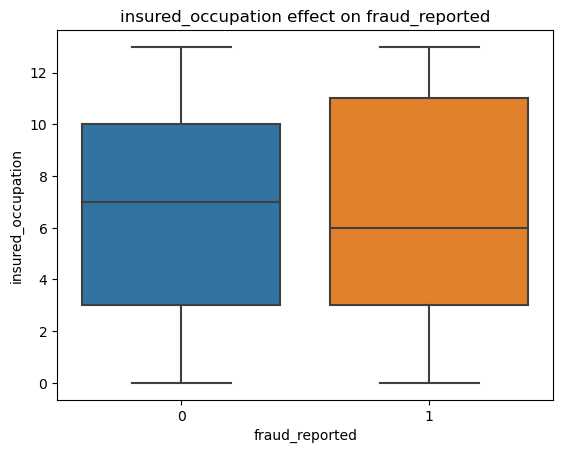

In [27]:
bp = sns.boxplot(x='fraud_reported',y='insured_occupation', data=df)
bp.set(title="insured_occupation effect on fraud_reported")

we observe that effect of insured_occupation approx same 

[Text(0.5, 1.0, 'incident_location effect on fraud_reported')]

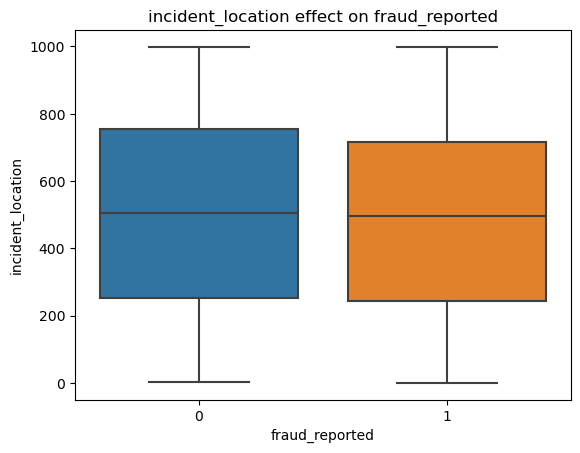

In [28]:
bp = sns.boxplot(x='fraud_reported',y='incident_location', data=df)
bp.set(title="incident_location effect on fraud_reported")

we observe there no effect of Property_Area

[Text(0.5, 1.0, 'capital-gains effect on fraud_reported')]

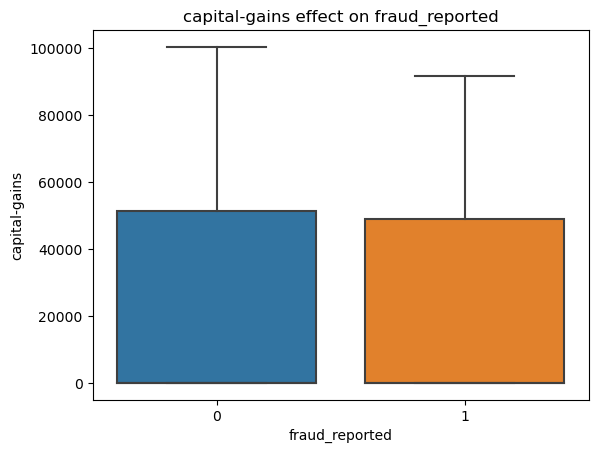

In [29]:
bp = sns.boxplot(x='fraud_reported',y='capital-gains', data=df)
bp.set(title="capital-gains effect on fraud_reported")

we observe that when Applicant capital-gains will decrease the froud report no percentage will increase

[Text(0.5, 1.0, 'capital-loss effect on fraud_reported')]

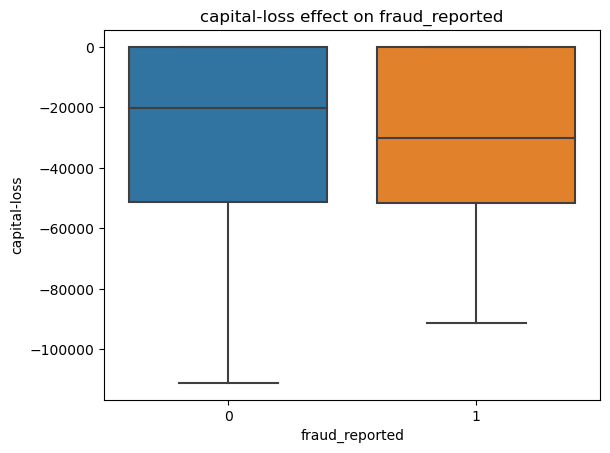

In [30]:
bp = sns.boxplot(x='fraud_reported',y='capital-loss', data=df)
bp.set(title="capital-loss effect on fraud_reported")

we observe that capital-loss effect is same 

[Text(0.5, 1.0, 'vehicle_claim effect on fraud_reported')]

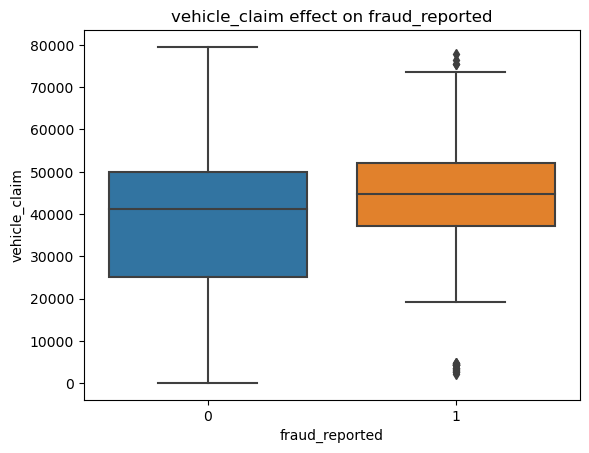

In [31]:
bp = sns.boxplot(x='fraud_reported',y='vehicle_claim', data=df)
bp.set(title="vehicle_claim effect on fraud_reported")

we observe that if vehicle_claim is highest then fraud reported less in number 

[Text(0.5, 1.0, 'bodily_injuries effect on fraud_reported')]

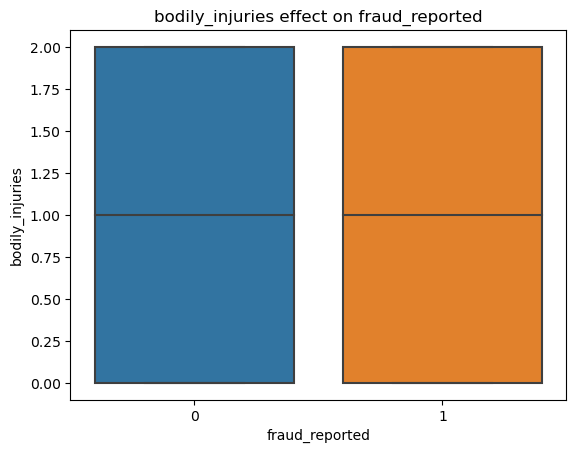

In [32]:
bp = sns.boxplot(x='fraud_reported',y='bodily_injuries', data=df)
bp.set(title="bodily_injuries effect on fraud_reported")

we observe there no effect of bodily_injuries

[Text(0.5, 1.0, 'insured_sex effect on fraud_reported')]

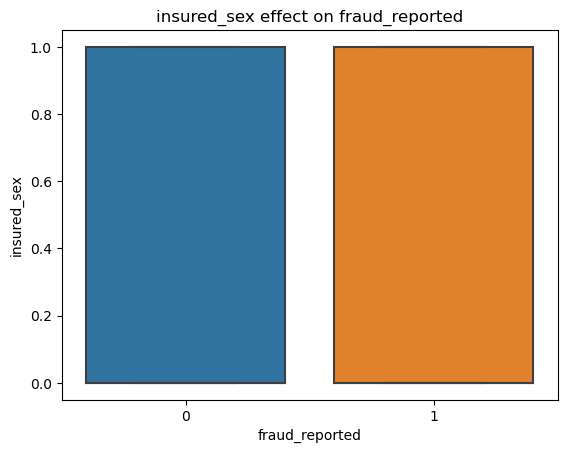

In [33]:
bp = sns.boxplot(x='fraud_reported',y='insured_sex', data=df)
bp.set(title="insured_sex effect on fraud_reported")

we observe that  insured_sex effect when we check on fraud report then we found same effect

# Cleaning of dataset

In [34]:
df.groupby('fraud_reported').mean()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
fraud_reported,,,,,,,,,,,,,,,,,,,,,
0,202.600266,38.884462,550571.297477,464.771580,1.00000,0.968127,1130.810093,1258.430000,1.023904e+06,500419.537849,...,0.976096,1.455511,0.984064,50288.605578,7179.229748,7018.884462,36090.491368,6.609562,19.313413,2005.075697
1,208.080972,39.141700,533030.206478,503.477733,1.05668,0.898785,1151.821862,1250.236275,1.336032e+06,503637.959514,...,1.040486,1.582996,0.931174,60302.105263,8208.340081,8560.121457,43533.643725,6.352227,19.331984,2005.186235


we observe that 39% age is reported no fraud 

# Correlation Matrix and Heatmap

In [35]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


Text(0.5, 1.0, 'Correlations Among Features')

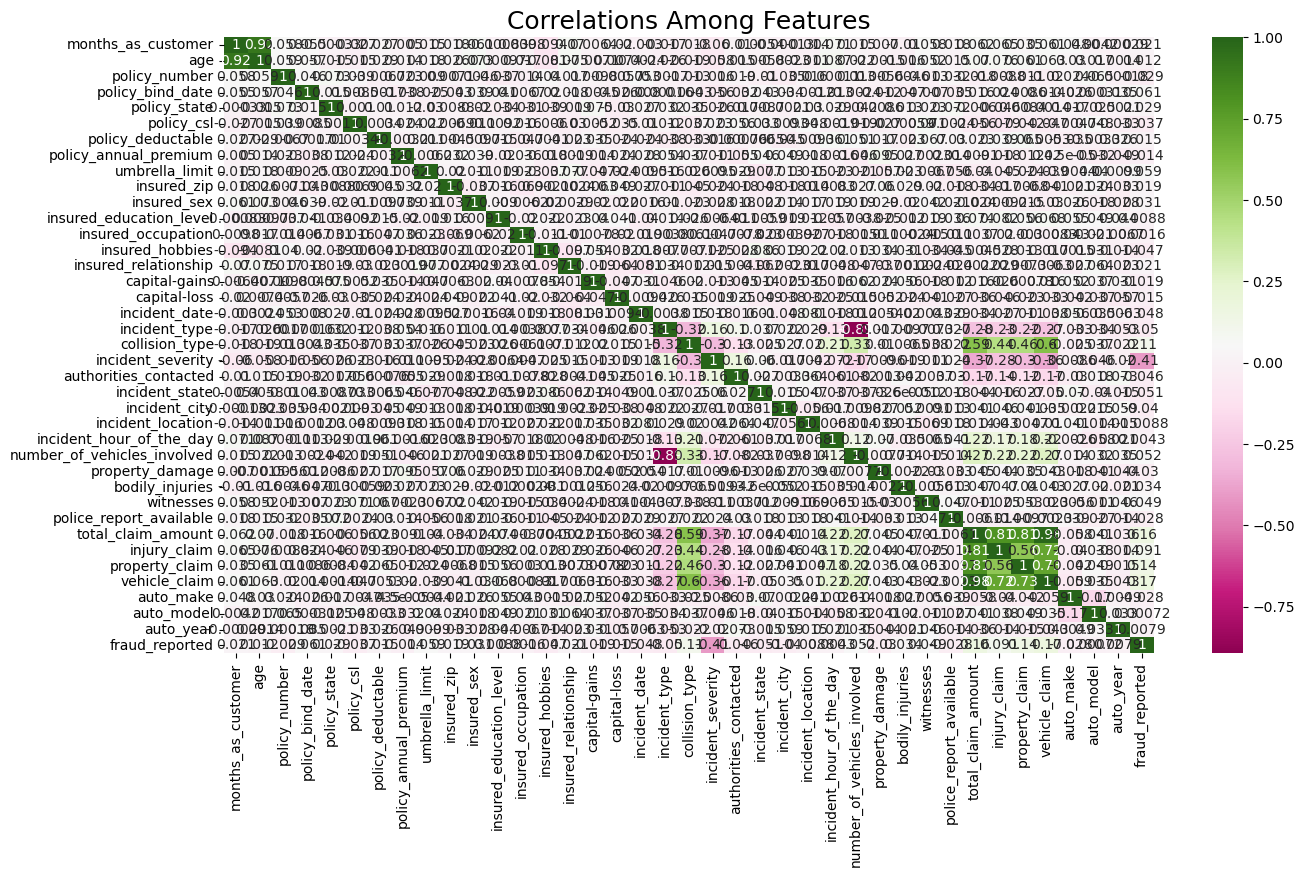

In [36]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

Positive Correlation Features:

months_as_customer             
age                            
policy_number                  
policy_bind_date               
policy_state                   
policy_csl                     
policy_deductable              
policy_annual_premium          
umbrella_limit                 
insured_zip                    
insured_sex                    
insured_education_level        
insured_occupation             
insured_hobbies               
capital-gains                  
capital-loss                   
incident_date                  
incident_type                  
collision_type                 
incident_severity             
authorities_contacted          
incident_state                
incident_city                  
incident_location              
  

Negative Correlation Features:

incident_hour_of_the_day       
number_of_vehicles_involved    
property_damage               
bodily_injuries                
witnesses                      
police_report_available        
total_claim_amount             
injury_claim                   
property_claim                 
vehicle_claim                 
auto_make                      
auto_model                     
auto_year                      
fraud_reported 


In [36]:

#Dropping irrelevant features
df = df.drop(['insured_zip','insured_sex','bodily_injuries','property_damage',
              'incident_date','auto_year','policy_number','incident_hour_of_the_day',
              'witnesses','policy_bind_date','age','authorities_contacted','incident_state','insured_education_level'], axis=1)

In [37]:
#Dropping irrelevant features
df = df.drop(['collision_type','vehicle_claim','vehicle_claim','injury_claim'], axis=1)

Text(0.5, 1.0, 'Correlations Among Features')

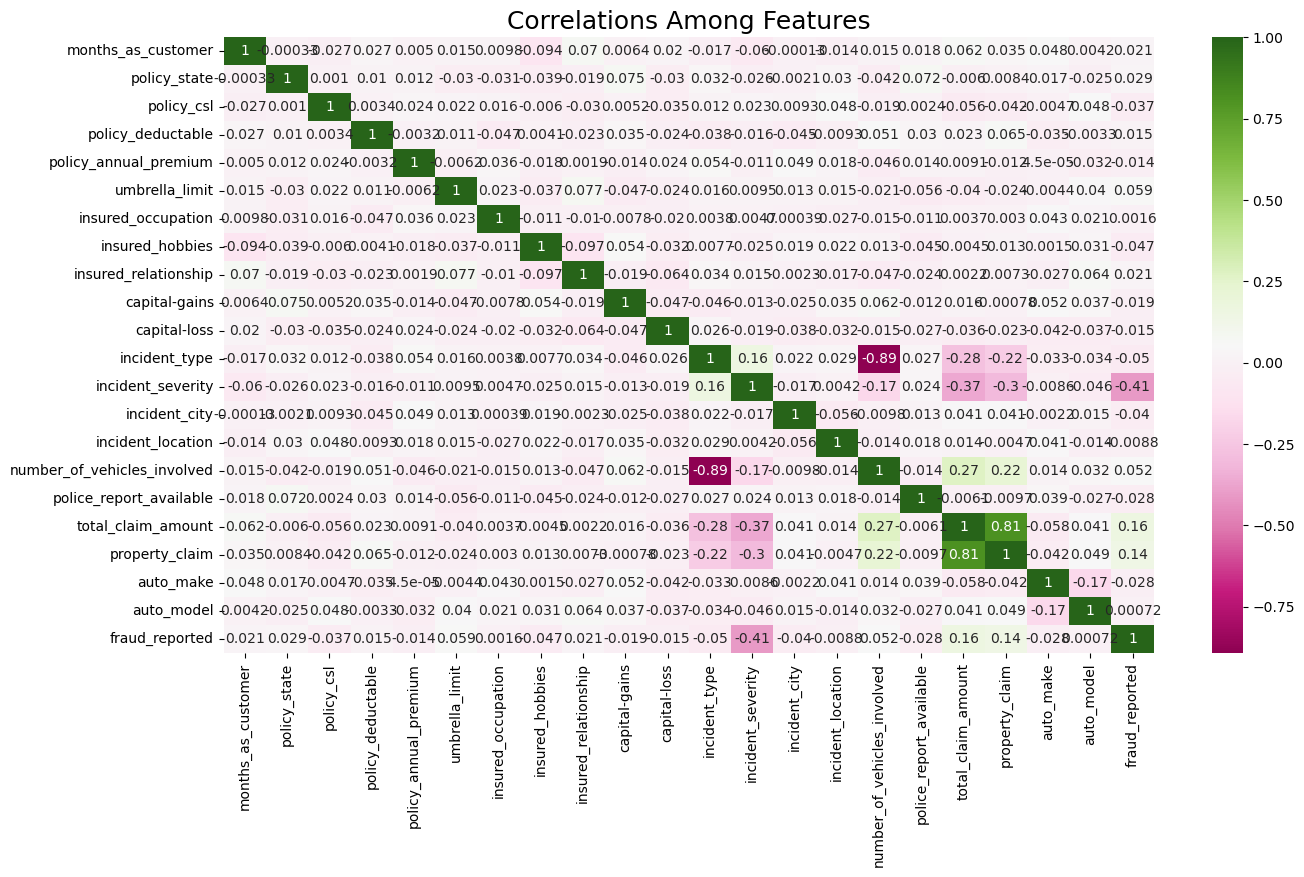

In [38]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

In [39]:
correlations = df.corr()['fraud_reported'].sort_values(ascending=False)
print(correlations)

fraud_reported                 1.000000
total_claim_amount             0.163651
property_claim                 0.137835
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
policy_deductable              0.014817
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
auto_make                     -0.027519
police_report_available       -0.028159
policy_csl                    -0.037190
incident_city                 -0.040403
insured_hobbies               -0.046838
incident_type                 -0.050376
incident_severity             -0.405988
Name: fraud_reported, dtype: float64


no data is skewed

<Axes: >

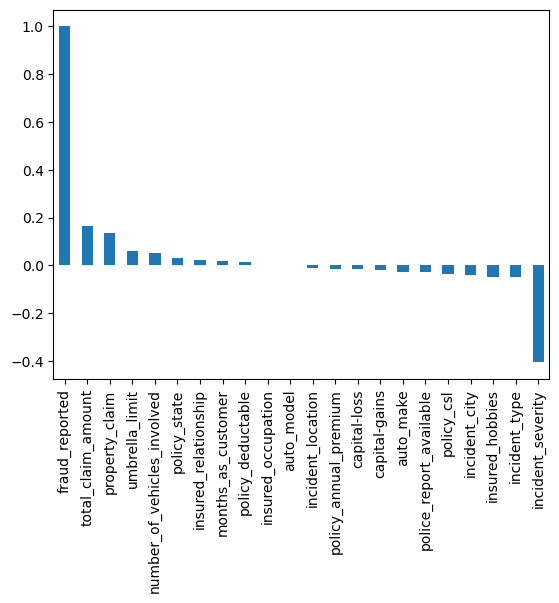

In [40]:
correlations.plot(kind='bar')

we observe that Total_claim_amount is positively and incident_severity is highly negatively correleted

# checking skewness

In [41]:
#checking skewness
df.skew()

months_as_customer             0.362177
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
incident_severity              0.279016
incident_city                  0.049531
incident_location              0.000000
number_of_vehicles_involved    0.502664
police_report_available        0.052967
total_claim_amount            -0.594582
property_claim                 0.378169
auto_make                     -0.018797
auto_model                    -0.080773
fraud_reported                 1.175051
dtype: float64

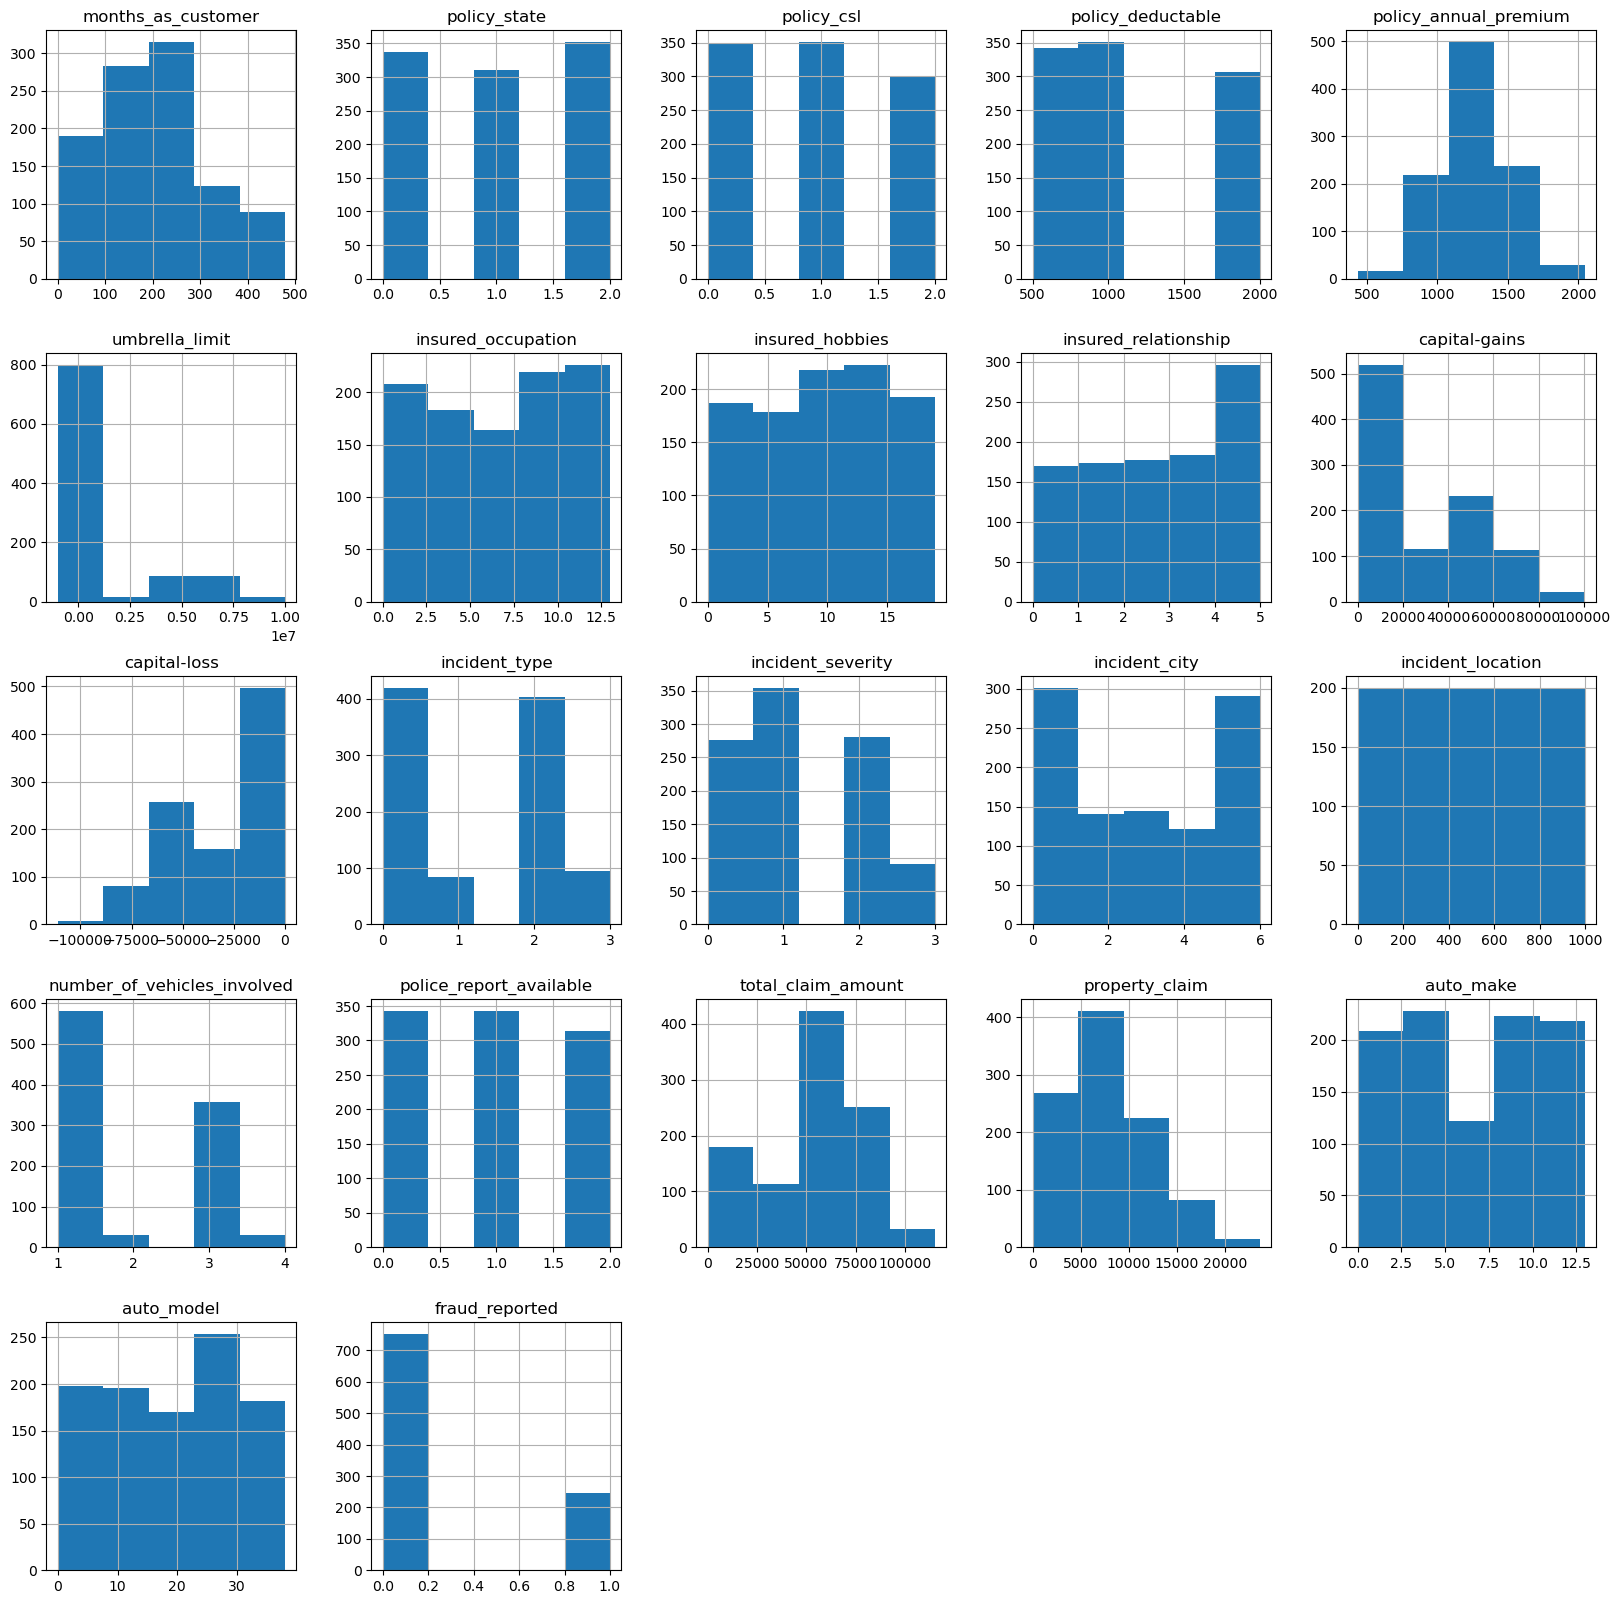

In [42]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

# Feature Selection

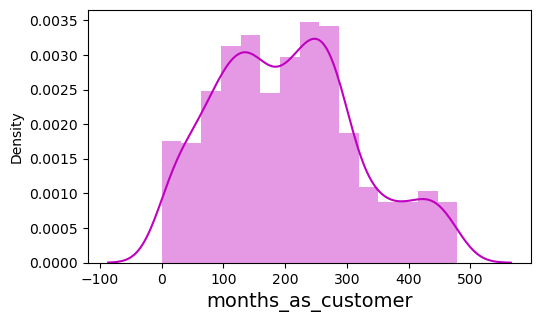

In [43]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=1:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we observe that all features data is normally distributed

# Separating feature and target

In [44]:
x=df.drop("fraud_reported", axis= 1)
y=df["fraud_reported"]

# Feature Scaling using Standard Scalarization

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,incident_type,incident_severity,incident_city,incident_location,number_of_vehicles_involved,police_report_available,total_claim_amount,property_claim,auto_make,auto_model
0,1.078140,1.187173,0.060937,-0.222383,0.616705,-0.479476,-1.158316,1.281737,-1.437957,1.011331,...,0.766005,-1.260614,-0.962196,1.719927,-0.823865,1.270313,0.714257,1.165505,0.856466,-1.645743
1,0.208995,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.162558,0.929078,-0.247595,-0.901927,...,1.691132,-0.195906,0.995476,0.445137,-0.823865,-1.198712,-1.807312,-1.372696,0.360539,-0.657470
2,-0.608002,1.187173,-1.182668,1.412784,0.642233,1.697980,1.082141,-1.363201,0.347586,0.358023,...,-1.084249,-0.195906,-0.962196,0.642591,1.140056,0.035801,-0.686362,-0.736072,-0.631315,0.959702
3,0.452355,-1.220886,0.060937,1.412784,0.652886,2.133471,-1.407256,-1.363201,0.942766,0.853388,...,0.766005,-1.260614,-1.451614,0.587166,-0.823865,0.035801,0.403135,-0.219722,-0.879279,1.319074
4,0.208995,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.082141,-1.363201,0.942766,1.467210,...,1.691132,-0.195906,-1.451614,-0.968217,-0.823865,0.035801,-1.753121,-1.399654,-1.623169,1.049545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,1.187173,1.304542,-0.222383,0.222884,-0.479476,-1.158316,0.576420,0.942766,-0.901927,...,0.766005,-0.195906,0.506058,0.213042,-0.823865,-1.198712,1.305049,0.273817,-0.135388,-1.196528
996,0.704407,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,0.584261,1.281737,1.537947,1.643100,...,0.766005,-1.260614,0.016640,-0.943968,-0.823865,-1.198712,2.111466,2.214794,1.600357,0.780016
997,-0.642767,1.187173,0.060937,-1.039966,0.520739,0.826998,-1.407256,-1.186872,-0.247595,0.358023,...,-1.084249,-0.195906,-1.451614,0.853901,1.140056,1.270313,0.558507,0.020826,1.104430,-0.028570
998,2.208028,-1.220886,1.304542,1.412784,0.411866,1.697980,-0.411497,-1.715859,1.537947,-0.901927,...,0.766005,-1.260614,-1.451614,0.240755,-0.823865,1.270313,-0.219110,-0.451976,-1.375206,-1.286371


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [46]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.024904,months_as_customer
1,1.021478,policy_state
2,1.012875,policy_csl
3,1.020193,policy_deductable
4,1.011628,policy_annual_premium
5,1.018725,umbrella_limit
6,1.010337,insured_occupation
7,1.032521,insured_hobbies
8,1.034801,insured_relationship
9,1.026009,capital-gains


we observe by checking vif values the feature not causing multicollineraity problem. in no any one have vif is not
more than 10 so no need to drop any feature.
and there no multicollineraity problem .

In [47]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# oversampling

In [48]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [49]:
y1.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [51]:
maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxAccu:
        maxAccu = acc
        maxRS  = 200
print("Best accuracy is =",  maxAccu, "at random_state ", maxRS) 

Best accuracy is = 0.9092920353982301 at random_state  200


we observe the best accuracy is 90.92% at random_state 200

# creat train test split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)

# classification algorithms

In [53]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [54]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.9048672566371682
[[205  23]
 [ 20 204]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       228
           1       0.90      0.91      0.90       224

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



we observe that RandomForestClassifier accuracy 90.48%

# LogisticRegression

In [55]:
# checking accuracy for LogisticRegression
LR = RandomForestClassifier()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR)) 
print(confusion_matrix(y_test, predLR)) 
print(classification_report(y_test, predLR))

0.8960176991150443
[[203  25]
 [ 22 202]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       228
           1       0.89      0.90      0.90       224

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



we observe that LogisticRegression acuracy 89.60%

# support vector classifier

In [56]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc)) 
print(confusion_matrix(y_test, predsvc)) 
print(classification_report(y_test, predsvc))

0.8429203539823009
[[188  40]
 [ 31 193]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       228
           1       0.83      0.86      0.84       224

    accuracy                           0.84       452
   macro avg       0.84      0.84      0.84       452
weighted avg       0.84      0.84      0.84       452



we observe that support vector classifier accuracy is 84.29%

# GradientBoostingClassifier

In [57]:
# checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8960176991150443
[[200  28]
 [ 19 205]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       228
           1       0.88      0.92      0.90       224

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



we observe that GradientBoostingClassifier accuracy 89.60%

# ExtraTreeClassifier

In [58]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET)) 
print(classification_report(y_test, predET))

0.7632743362831859
[[169  59]
 [ 48 176]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       228
           1       0.75      0.79      0.77       224

    accuracy                           0.76       452
   macro avg       0.76      0.76      0.76       452
weighted avg       0.76      0.76      0.76       452



we observe that ExtraTreeClassifier accuracy 76.32%

# Cross Validation Score

In [59]:
from sklearn.model_selection import cross_val_score

cv=5--- it's a fold value 1,2,3,4,5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafult scoring parameter is - r2 score

In [60]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predRFC) - score.mean())

[0.795 0.775 0.755 0.765 0.78 ]
0.774
Difference between Accuracy score and cross validation score is - 0.13086725663716814


In [61]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predLR) - score.mean())

[0.825 0.76  0.735 0.785 0.79 ]
0.779
Difference between Accuracy score and cross validation score is - 0.11701769911504423


In [62]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predsvc) - score.mean())

[0.755 0.775 0.74  0.775 0.765]
0.762
Difference between Accuracy score and cross validation score is - 0.08092035398230091


In [63]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predGB) - score.mean())

[0.805 0.77  0.775 0.845 0.86 ]
0.8110000000000002
Difference between Accuracy score and cross validation score is - 0.08501769911504409


In [64]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predET) - score.mean())

[0.675 0.67  0.67  0.73  0.655]
0.68
Difference between Accuracy score and cross validation score is - 0.08327433628318581


Support Vector Classifier is our best model as the difference between accuracy score and cross validation score
is =0.08092035398230091 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

# Hyper Parameter Tuning

In [65]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

parameters={'kernel':['linear','rbf'],'C':[1,10],'degree':[3,5],'cache_size':[200,400],'max_iter':[-1,-2]}

In [66]:
GCV=GridSearchCV(SVC(),parameters, cv =5)

In [67]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'cache_size': [200, 400],
                         'degree': [3, 5], 'kernel': ['linear', 'rbf'],
                         'max_iter': [-1, -2]})

In [68]:
GCV.best_params_

{'C': 10, 'cache_size': 200, 'degree': 3, 'kernel': 'rbf', 'max_iter': -1}

In [69]:
Final_model = SVC(C =  10, cache_size = 200, degree = 3, kernel = 'rbf', max_iter = -1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

90.2654867256637


# Plotting ROC compare auc for all the models used

In [70]:
#Plotting ROC compare auc for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

Plotting ROC compare auc for best model

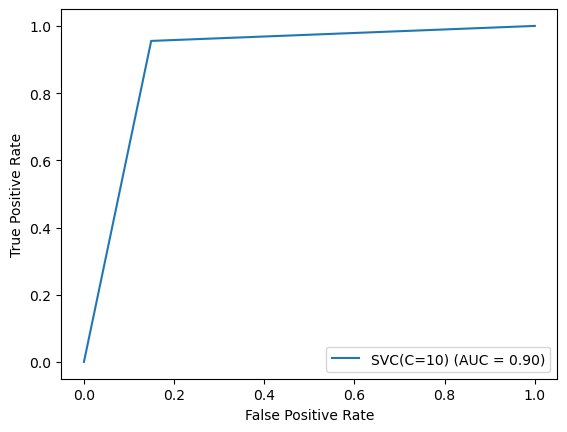

In [71]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

# Saving the model

In [72]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Third_Phase_Evaluation_Project_3_Insurance_Claim_Fraud_Detection_Prediction_Project_Analysis.pkl")

['Third_Phase_Evaluation_Project_3_Insurance_Claim_Fraud_Detection_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [73]:
# first we load the saved model and get prediction
model = joblib.load("Third_Phase_Evaluation_Project_3_Insurance_Claim_Fraud_Detection_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,

# These Are the Prediction for Insurance Claim Fraud Detection 

In [74]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,0,1
4,0,0
...,...,...
447,1,1
448,0,0
449,0,0
450,0,0


our findings

Support Vector Classifier is our best model as the difference between accuracy score and cross validation score
is =0.08092035398230091 and this is least out of all

and its accuracy is 84.29 before hyper tuning and after hyper tuning accuracy is 90.65

finaly we observe that Support Vector Classifier is our best model

we also observe that after visualization of features and doing other EDA our findings-
1.We observe that in this data set numerical as well as categorical data is present.
2.Number of null or missing values in dataset 1000.
3.We observe that there is 1000 row and 40 column are present.
4.We observe that there is three datatype are present int,float and object.
5.There are 19 Numerical column are present and 21Categorical columns also present.
6.We observe that if vehicle_claim is highest then fraud reported less in number.
7.We observe that insured_sex effect when we check on fraud report then we found same effect.
8.We observe that capital-loss effect is same.
9.We observe that 39% age is reported no fraud.
10.we observe that support vector classifier accuracy is 84.29% finaly we observe that Support Vector Classifier is our best model beacuse Support Vector Classifier is our best model as the difference between accuracy score and cross validation score
is =0.08092035398230091 and this is least out of all and its accuracy is 84.29 before hyper tuning and after hyper tuning accuracy is 90.65.

                  